# Miles Per Gallon: Scikit-Learn
Here, we'll try to use scikit-learn to see if we can predict the MPG of my car in 2016 based on the values for 2014 and 2015.

In [1]:
# Import the modules
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import sklearn           as sk

## Preping the data
First thing we need to do is to get the inputs into the appropriate format. For this, we will use only columns that are reasonably related to MPG:
* Miles (miles driven)
* Week of year (number in range 1-52)
* Gas Pumped (how much fuel I put in my car)
* Avg Spd (my average speed in miles per hour)

We wont use the shifted week values, because we want to stick as closely as possible to the original data format as possible for simplicity sake.

In [32]:
# Load the data
db = pd.read_pickle('data/data_formatted.pkl')

# Extract the year and week number
db['Year'] = [date.year for date in db.Date]
db['Week'] = [date.weekofyear for date in db.Date]
db = db.drop(['Date','Price/Gal', 'Car MPG', 'paid ($)', 'Price/Barrel', 'Longitude', 'Latitude', 'Car gas', 'notes'], axis=1)
db = db.dropna(subset=['Miles', 'Real MPG'])

# Print column information
db.describe

<bound method NDFrame.describe of      Miles  Gas Pumped  Avg Spd  Real MPG  Year  Week
49   383.0      12.461     64.0    30.736  2013     1
50   447.4      13.559     61.3    32.997  2014     1
51   399.3      13.406     47.0    29.785  2014     2
52   436.1      13.477     39.3    32.359  2014     4
53   430.1      13.231     48.7    32.507  2014     5
..     ...         ...      ...       ...   ...   ...
195  419.4      13.820     61.0    30.347  2017     1
196  394.1      14.217     45.7    27.720  2017     2
197  430.4      14.068     41.5    30.594  2017     3
198  417.2      13.665     44.7    30.531  2017     4
199  422.4      13.757     46.5    30.704  2017     5

[110 rows x 6 columns]>

In [33]:
# Extract training and testing samples
train = db[(db.Year >= 2014) & (db.Year <= 2015)]
test  = db[(db.Year == 2016)]

# Split out the features (x) and true values (y)
train_x = train.drop(['Real MPG','Year'], axis=1)
train_y = train['Real MPG']
test_x  = test.drop(['Real MPG','Year'], axis=1)
test_y  = test['Real MPG']

Now comes the machine learning part! Let's put it into a [random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor). Because the desired output is a continuous value, I'm using a regression formula here.

In [34]:
# Import the random forest regressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics  import mean_absolute_error

# Construct the model and run the fit
model = RandomForestRegressor(random_state=1, n_estimators=100, criterion='mae')
model.fit(train_x, train_y)

# Make some predictions form our test data
mpg_preds = model.predict(test_x)
print(f'Mean absolute error: {mean_absolute_error(test_y, mpg_preds)} mpg')

Mean absolute error: 0.8007290909090822 mpg


## Visualizing the predictions
So it looks like we can predict the MPG to within +/- 0.8 MPG. That's pretty fantastic! So what does this look like?

Text(0, 0.5, 'Predicted MPG')

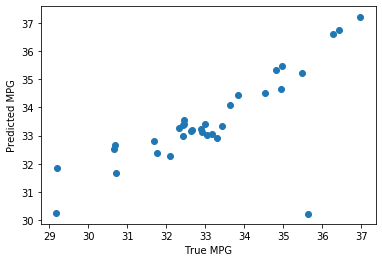

In [35]:
plt.scatter(test_y, mpg_preds)
plt.xlabel('True MPG')
plt.ylabel('Predicted MPG')

And just for kicks let's plot the prediction and true values over time

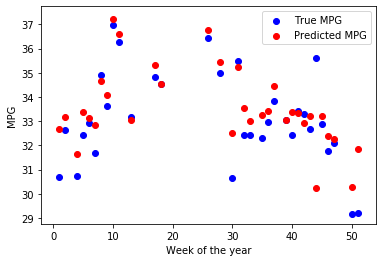

In [36]:
plt.scatter(test_x.Week, test_y, color='blue', label='True MPG')
plt.scatter(test_x.Week, mpg_preds, color='red', label='Predicted MPG')
plt.xlabel('Week of the year')
plt.ylabel('MPG')
leg = plt.legend()

Not too shabby if I do say so myself!